In [1]:
#### more simple analysis, no CV, trial by trial

In [2]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

***decode angle in each TR***  
trial by trial

In [35]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  angle_16.345  angle_18.68  angle_21.015  angle_23.35  angle_25.685  \
0  ...    353.306880   301.334949     53.138939   146.178575    172.671739   
1  ...    239.733096   254.710918    277.986737    15.277336     22.813718   
2  ...    358.545119   340.488780    342.883275   330.619499    159.648407   
3  ...     41.006448   233.746383     50.056368    22.161452     12.949112   
4  ...    172.449342   133.071008      3.575792   311.213662    356.300365   

   angle_28.02  angle_30.355  angle_32.69  angle_35.025  brain_region  
0   334.001720    342.383377   335.097734    180.318258        visual  
1    26.142667     29.932089   195.239276    190.548065        visual  
2   157.173739    168.093078   163.740625    328.732464        visual  
3   338.683813    209.808055   201.980750    187.059487        visual  
4     6.816928    337.767719   187.996226    173.282839        visual  

[5 rows x 79 columns]

In [36]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

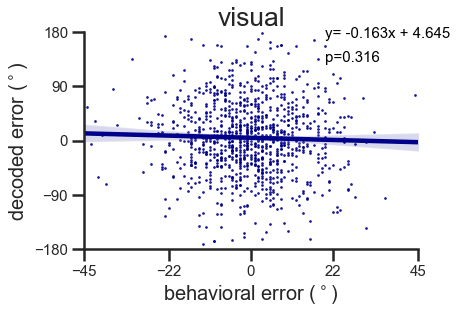

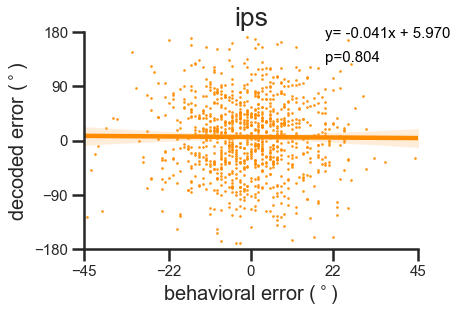

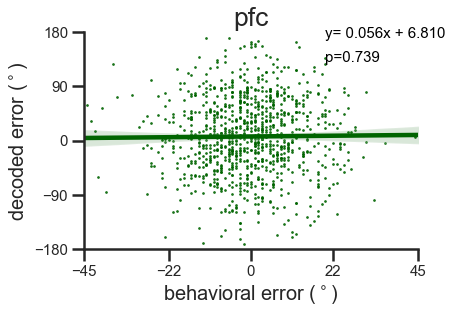

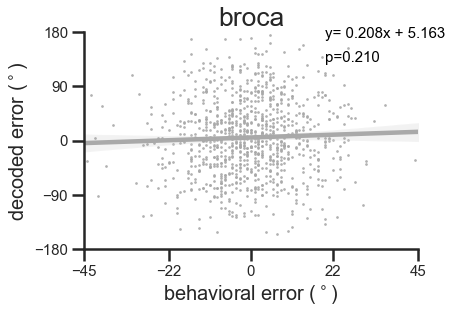

In [40]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-180, 180)
    plt.yticks([-180, -90, 0, 90, 180], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 170, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 130, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


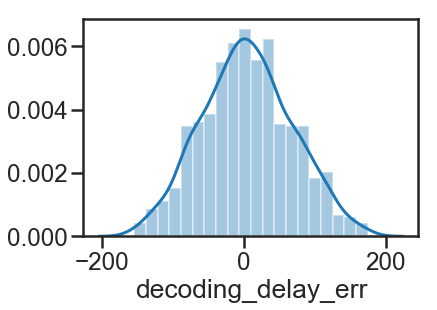

In [38]:
sns.distplot(df_['decoding_delay_err'])

***decode angle in each TR***  
***make the reconstruction positive***  
trial by trial

In [49]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  angle_16.345  angle_18.68  angle_21.015  angle_23.35  angle_25.685  \
0  ...    165.016695   185.989337    169.648930   165.969570    174.572011   
1  ...    198.751891   206.194939    206.697039   145.237059    156.414844   
2  ...    154.392591   156.700290    157.582733   171.276048    166.498625   
3  ...    199.391291   203.365027    198.739539   143.370512    205.183617   
4  ...    175.798800   176.034384    205.098244   196.601793    202.865360   

   angle_28.02  angle_30.355  angle_32.69  angle_35.025  brain_region  
0   200.025291    210.676536   191.553862    179.992426        visual  
1   166.377877    174.995157   190.681028    189.919690        visual  
2   166.093747    172.354632   172.334289    176.667186        visual  
3   196.686808    196.513935   199.823967    189.813245        visual  
4   169.021167    188.368410   186.437949    178.881317        visual  

[5 rows x 79 columns]

In [50]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

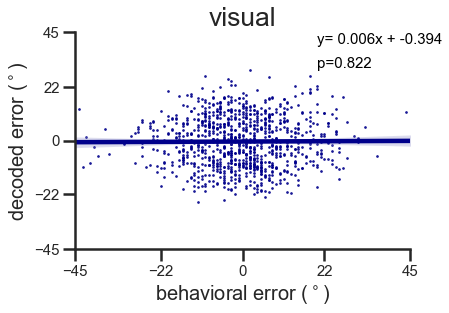

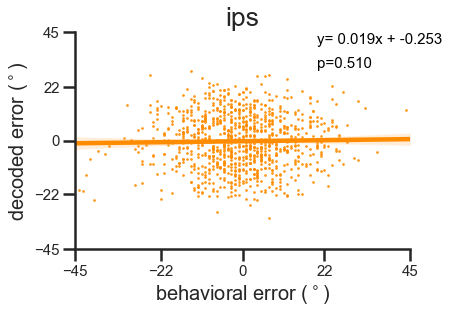

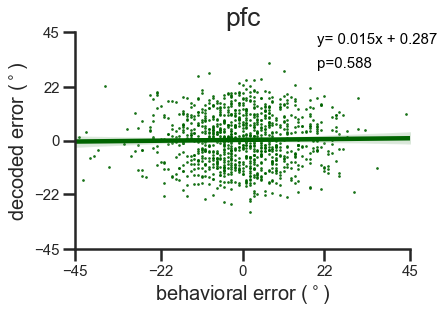

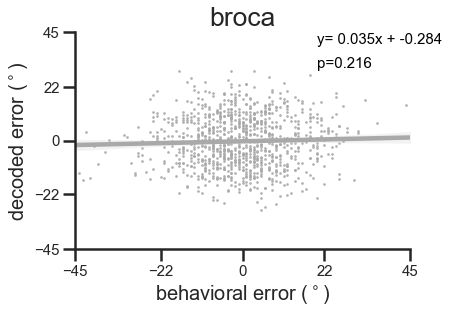

In [51]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


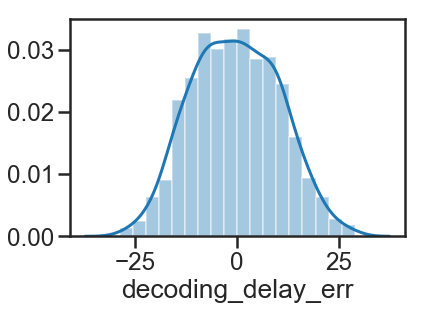

In [52]:
sns.distplot(df_['decoding_delay_err'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


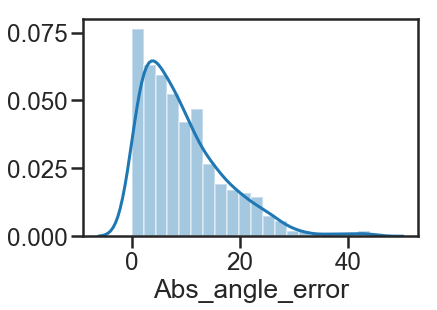

In [53]:
sns.distplot(df_['Abs_angle_error'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

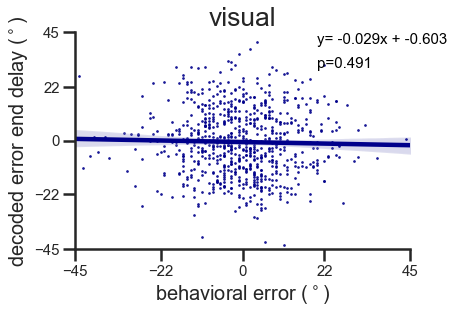

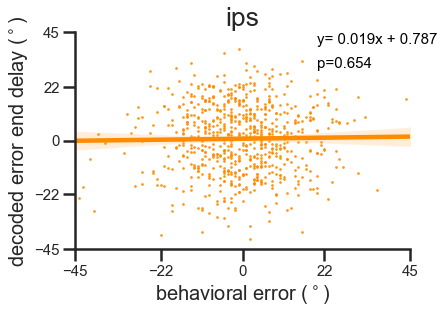

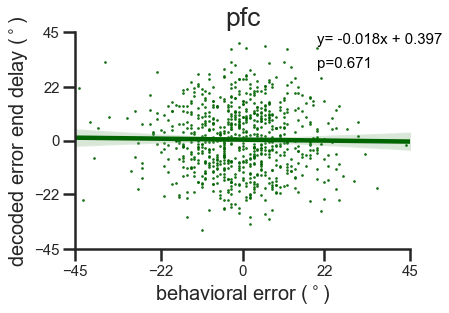

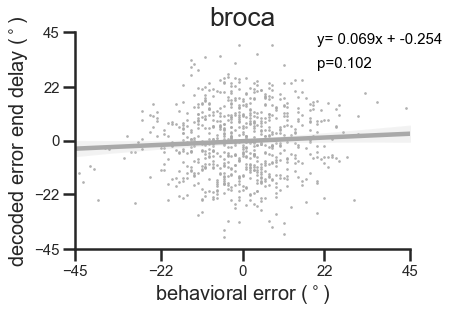

In [98]:
### last 2 TRs of the delay

colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_a= df.loc[(df['Condition']!='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_a['decoding_delay'] = df_a[['angle_16.345', 'angle_18.68']].mean(axis=1)
    df_a['decoding_delay_err'] = 180 - df_a['decoding_delay']
    df_a = df_a[~np.isnan(df_a['decoding_delay'])]
    ##
    df_b= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_b['decoding_delay'] = df_a[['angle_23.35', 'angle_25.685']].mean(axis=1) 
    df_b['decoding_delay_err'] = 180 - df_b['decoding_delay']
    df_b = df_b[~np.isnan(df_b['decoding_delay'])]
    df_ = pd.concat([df_a, df_b])
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error end delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

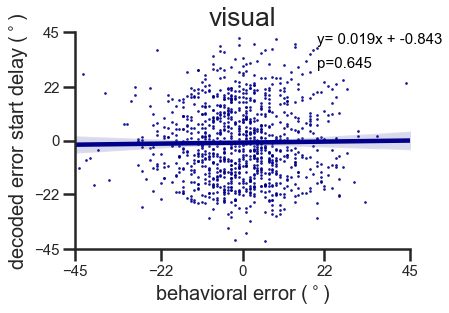

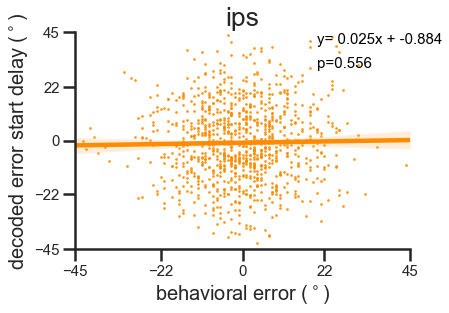

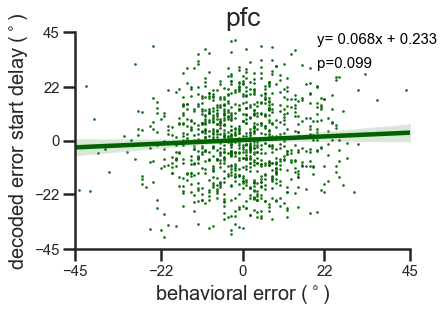

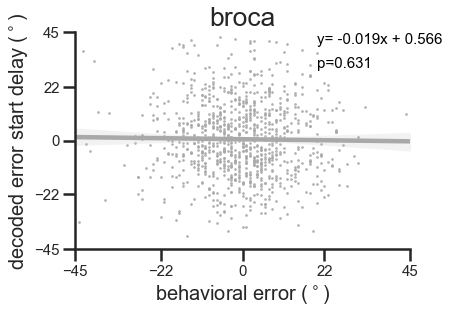

In [103]:
### first TR of the delay
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_a= df.loc[(df['Condition']!='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_a['decoding_delay'] = df_a['angle_9.34']
    df_a['decoding_delay_err'] = 180 - df_a['decoding_delay']
    df_a = df_a[~np.isnan(df_a['decoding_delay'])]
    ##
    df_b= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_b['decoding_delay'] = df_b['angle_16.345']
    df_b['decoding_delay_err'] = 180 - df_b['decoding_delay']
    df_b = df_b[~np.isnan(df_b['decoding_delay'])]
    df_ = pd.concat([df_a, df_b])
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())


In [ ]:
###by conditions

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

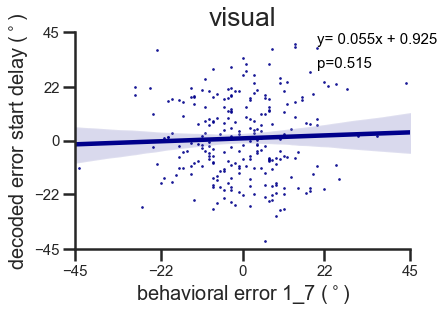

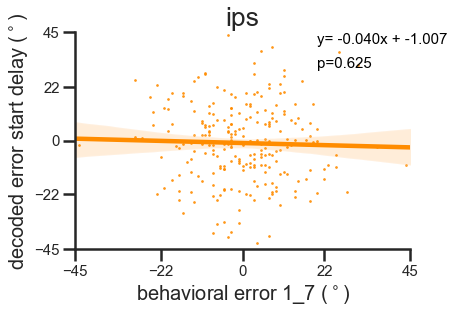

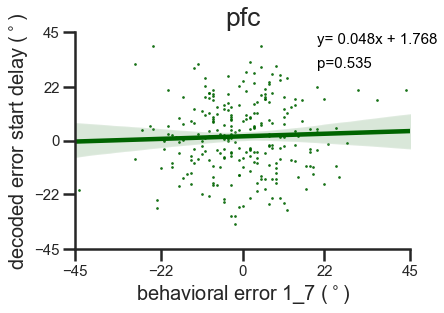

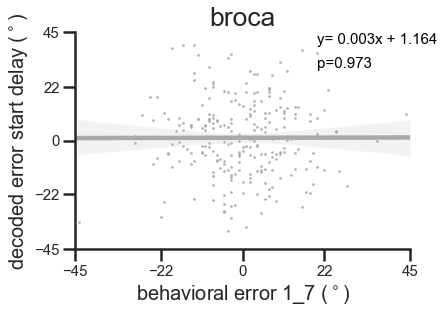

In [104]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='1_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 1_7 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

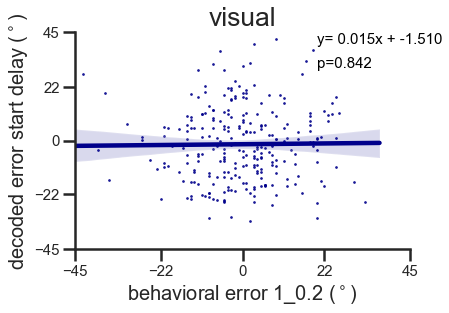

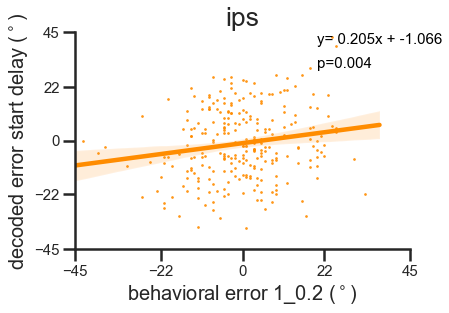

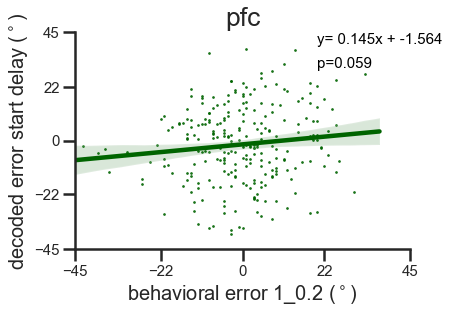

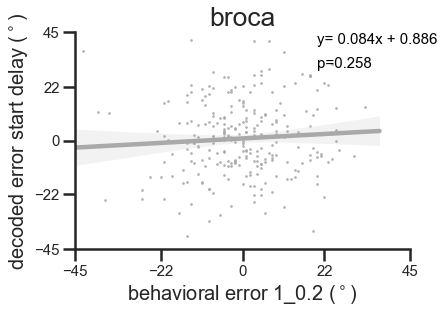

In [107]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 1_0.2 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

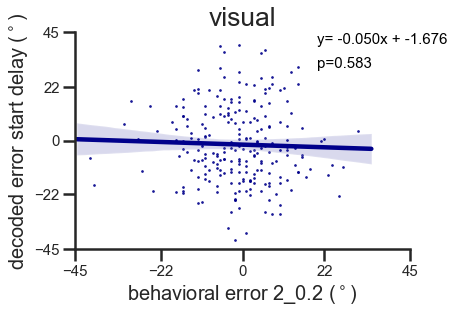

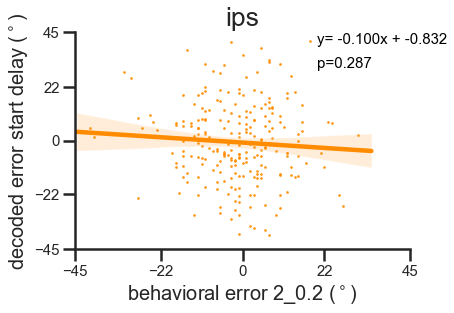

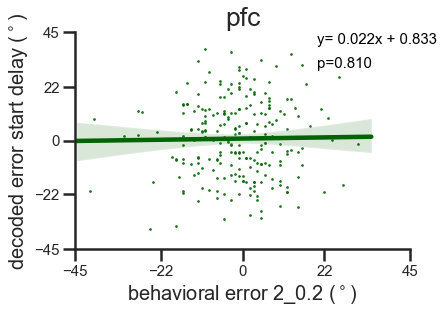

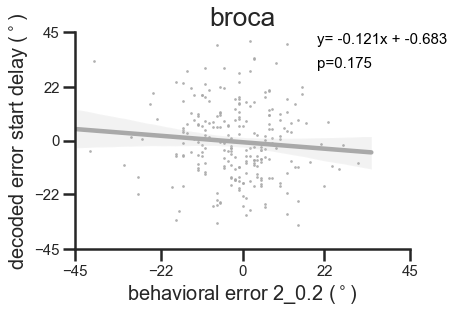

In [108]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='2_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 2_0.2 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

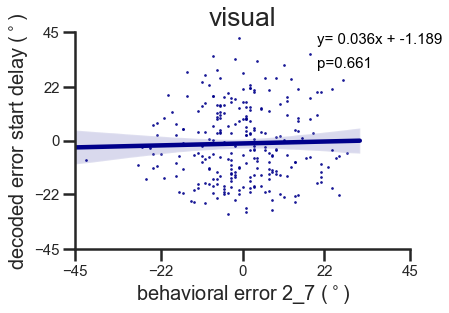

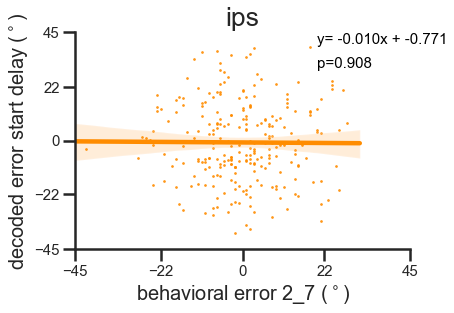

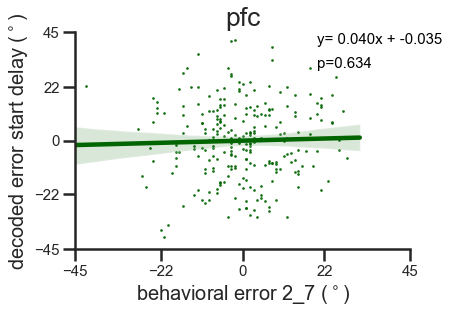

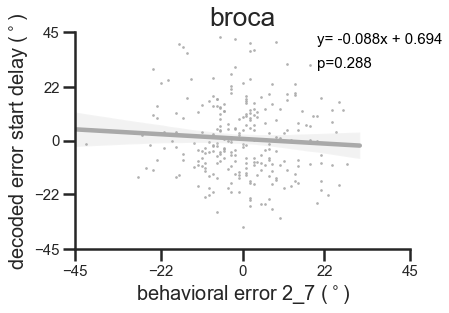

In [109]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_16.345']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 2_7 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

In [ ]:
##Look at the signal decoding

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


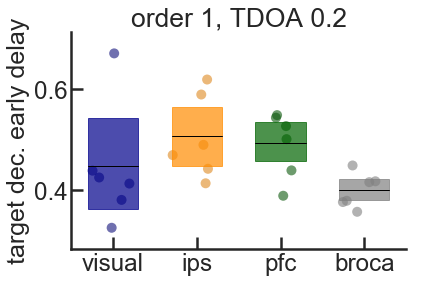

                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    3.560506     3.0  6.379892  0.000266
Residual      384.704842  2068.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.1062   0.0372 0.1751  True 
broca   pfc    0.0915   0.0226 0.1604  True 
broca  visual  0.0474  -0.0215 0.1163 False 
 ips    pfc   -0.0147  -0.0836 0.0542 False 
 ips   visual -0.0587  -0.1276 0.0102 False 
 pfc   visual -0.0441   -0.113 0.0248 False 
--------------------------------------------


In [129]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 0.2')
plt.show()


###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_1_02).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_02['decoding_delay'].values, groups=df_1_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    2.264485     3.0  4.273883  0.005131
Residual      343.337914  1944.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.0808   0.0116 0.1501  True 
broca   pfc    0.0832   0.0139 0.1524  True 
broca  visual  0.0399  -0.0294 0.1091 False 
 ips    pfc    0.0023  -0.0669 0.0715 False 
 ips   visual  -0.041  -0.1102 0.0283 False 
 pfc   visual -0.0433  -0.1125 0.026  False 
--------------------------------------------


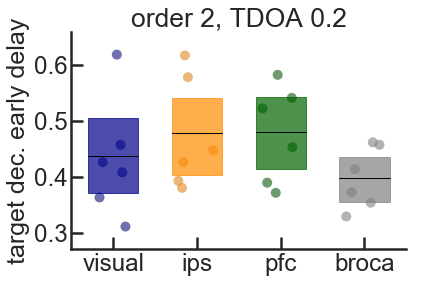

<Figure size 432x288 with 0 Axes>

In [131]:
df_2_02 = df.loc[(df['Condition']=='2_0.2')]
df_2_02['decoding_delay'] = df_2_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 0.2')
plt.figure()

###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_02).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_02['decoding_delay'].values, groups=df_2_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


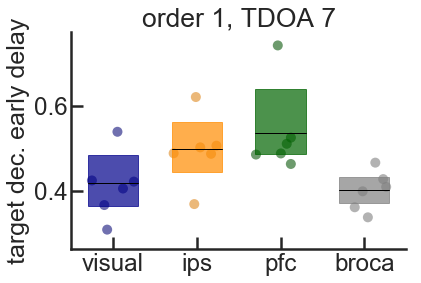

                                 
                                 Anova Table
                  sum_sq      df          F        PR(>F)
brain_region    5.908833     3.0  10.377355  8.975335e-07
Residual      360.617984  1900.0        NaN           NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0969   0.0243  0.1695  True 
broca   pfc    0.1343   0.0617  0.207   True 
broca  visual  0.016   -0.0566  0.0886 False 
 ips    pfc    0.0375  -0.0352  0.1101 False 
 ips   visual -0.0809  -0.1535 -0.0083  True 
 pfc   visual -0.1184   -0.191 -0.0458  True 
---------------------------------------------


In [132]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 7')
plt.show()



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_1_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_7['decoding_delay'].values, groups=df_1_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


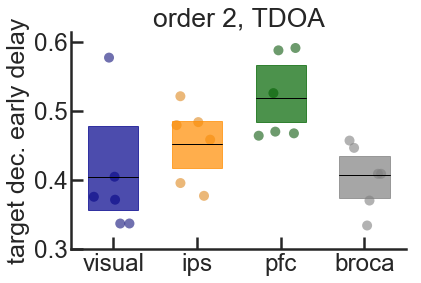

                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    4.340840     3.0  7.234508  0.000079
Residual      404.812595  2024.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0456  -0.0266  0.1178 False 
broca   pfc    0.1119   0.0397  0.1841  True 
broca  visual  -0.002  -0.0742  0.0702 False 
 ips    pfc    0.0663  -0.0059  0.1385 False 
 ips   visual -0.0476  -0.1198  0.0246 False 
 pfc   visual -0.1139  -0.1861 -0.0417  True 
---------------------------------------------


In [133]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA')
plt.show()



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['decoding_delay'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    3.208649     3.0  3.715492  0.011101
Residual      582.633075  2024.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0686   -0.018  0.1553 False 
broca   pfc    0.0752  -0.0114  0.1619 False 
broca  visual -0.0138  -0.1004  0.0729 False 
 ips    pfc    0.0066   -0.08   0.0933 False 
 ips   visual -0.0824   -0.169  0.0042 False 
 pfc   visual  -0.089  -0.1757 -0.0024  True 
---------------------------------------------


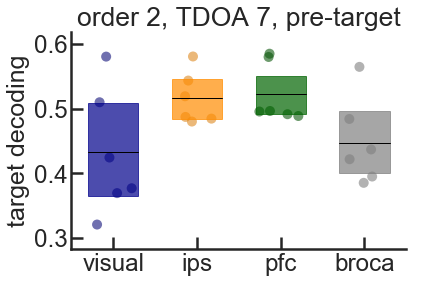

In [134]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7, pre-target')



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['decoding_delay'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


In [ ]:
##

In [2]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  angle_16.345  angle_18.68  angle_21.015  angle_23.35  angle_25.685  \
0  ...    165.016695   185.989337    169.648930   165.969570    174.572011   
1  ...    198.751891   206.194939    206.697039   145.237059    156.414844   
2  ...    154.392591   156.700290    157.582733   171.276048    166.498625   
3  ...    199.391291   203.365027    198.739539   143.370512    205.183617   
4  ...    175.798800   176.034384    205.098244   196.601793    202.865360   

   angle_28.02  angle_30.355  angle_32.69  angle_35.025  brain_region  
0   200.025291    210.676536   191.553862    179.992426        visual  
1   166.377877    174.995157   190.681028    189.919690        visual  
2   166.093747    172.354632   172.334289    176.667186        visual  
3   196.686808    196.513935   199.823967    189.813245        visual  
4   169.021167    188.368410   186.437949    178.881317        visual  

[5 rows x 79 columns]

In [4]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

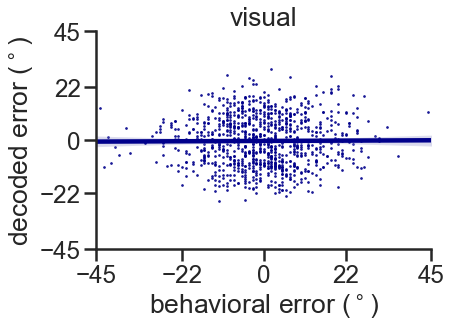

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              107.0520          
Min. group size:  141     Likelihood:         -3742.5058        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.393      0.334   -1.177   0.239   -1.048    0.261
A_err          0.006      0.027    0.224   0.822   -0.047    0.059
Group Var      0.012      0.077                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


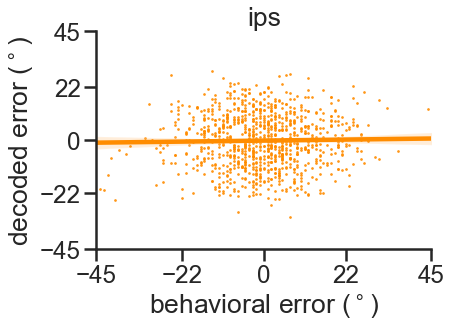

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              122.4153          
Min. group size:  141     Likelihood:         -3809.1159        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.253      0.352   -0.719   0.472   -0.943    0.437
A_err          0.019      0.029    0.648   0.517   -0.039    0.077
Group Var      0.001      0.049                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


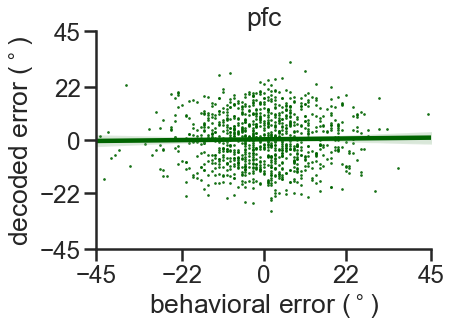

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8697          
Min. group size:  141     Likelihood:         -3777.5231        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.287      0.342   0.837   0.403   -0.384    0.958
A_err           0.015      0.028   0.539   0.590   -0.040    0.071
Group Var       0.009      0.065                                  



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


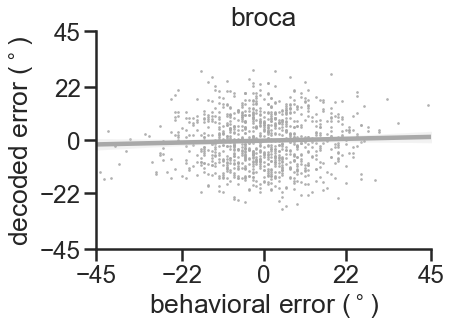

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8431          
Min. group size:  141     Likelihood:         -3777.3762        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.284      0.341   -0.833   0.405   -0.953    0.384
A_err          0.035      0.029    1.210   0.226   -0.022    0.091
Group Var      0.000      0.051                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())
    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

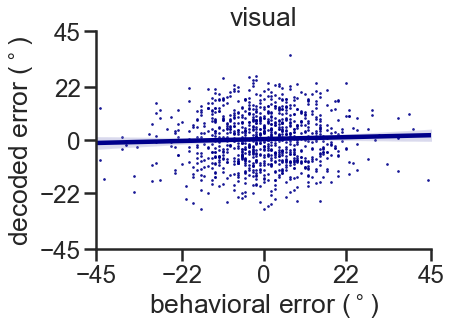

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              115.0923          
Min. group size:  134     Likelihood:         -3662.1514        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.424      4.394   0.097   0.923   -8.187    9.036
A_err           0.038      0.030   1.279   0.201   -0.020    0.096
Group Var     115.092                                             



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


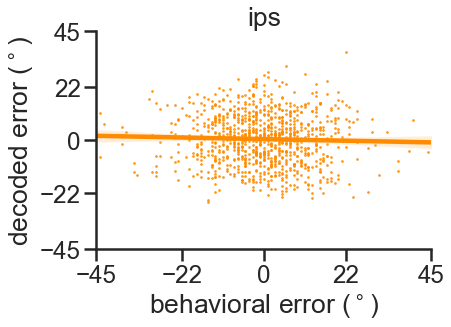

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              111.8633          
Min. group size:  134     Likelihood:         -3648.4922        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      0.391      4.331    0.090   0.928   -8.098    8.881
A_err         -0.029      0.029   -0.979   0.328   -0.086    0.029
Group Var    111.863                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


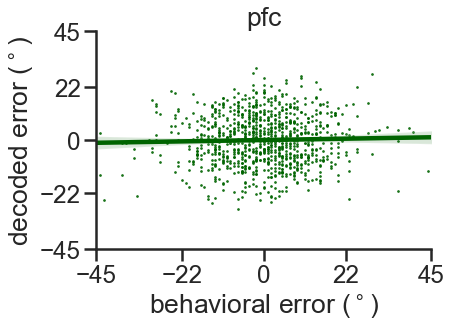

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              109.1474          
Min. group size:  134     Likelihood:         -3636.6944        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.018      4.279   0.004   0.997   -8.368    8.404
A_err           0.032      0.029   1.126   0.260   -0.024    0.089
Group Var     109.147                                             



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


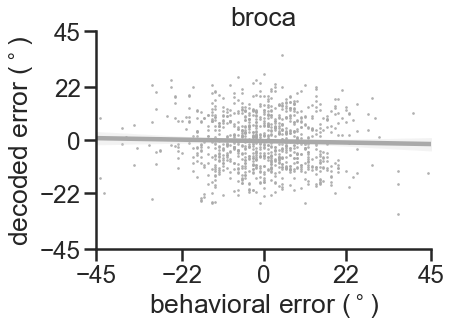

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              115.7969          
Min. group size:  134     Likelihood:         -3665.0810        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.431      4.407   -0.098   0.922   -9.069    8.206
A_err         -0.025      0.030   -0.832   0.405   -0.083    0.033
Group Var    115.797                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [11]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] != df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

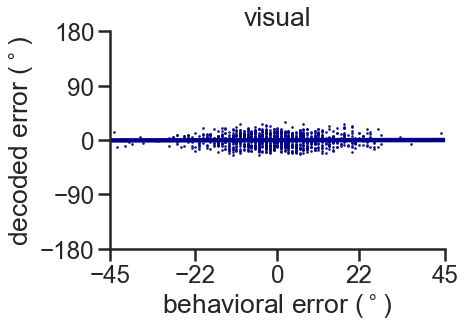

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              107.0520          
Min. group size:  141     Likelihood:         -3742.5058        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.393      0.334   -1.177   0.239   -1.048    0.261
A_err          0.006      0.027    0.224   0.822   -0.047    0.059
Group Var      0.012      0.077                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


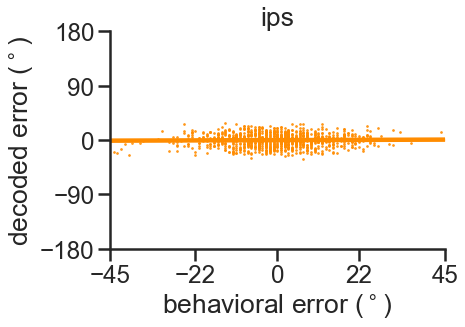

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              122.4153          
Min. group size:  141     Likelihood:         -3809.1159        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.253      0.352   -0.719   0.472   -0.943    0.437
A_err          0.019      0.029    0.648   0.517   -0.039    0.077
Group Var      0.001      0.049                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


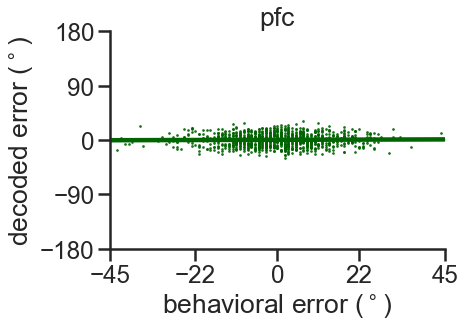

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8697          
Min. group size:  141     Likelihood:         -3777.5231        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.287      0.342   0.837   0.403   -0.384    0.958
A_err           0.015      0.028   0.539   0.590   -0.040    0.071
Group Var       0.009      0.065                                  



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


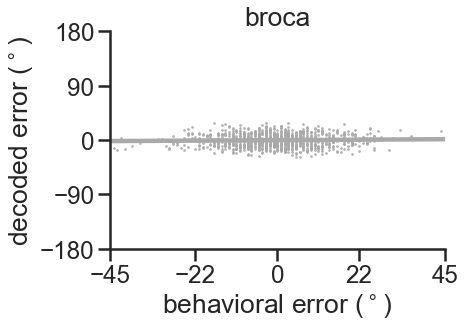

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8431          
Min. group size:  141     Likelihood:         -3777.3762        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.284      0.341   -0.833   0.405   -0.953    0.384
A_err          0.035      0.029    1.210   0.226   -0.022    0.091
Group Var      0.000      0.051                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [7]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-180, 180)
    plt.yticks([-180,-90,0,90,180])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())
    

In [ ]:
## By condition

In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'type', 'delay1', 'delay2', 'T', 'NT1', 'NT2',
       'Dist', 'Dist_NT1', 'Dist_NT2', 'distance_T_dist', 'cue', 'order',
       'orient', 'horiz_vertical', 'A_R', 'A_err', 'Abs_angle_error',
       'Error_interference', 'A_DC', 'A_DC_dist', 'Q_DC', 'A_DF', 'A_DF_dist',
       'Q_DF', 'A_DVF', 'Q_DVF', 'A_DVF_dist', 'Q_DVF_dist',
       'presentation_att_cue_time', 'presentation_target_time',
       'presentation_dist_time', 'presentation_probe_time', 'R_T',
       'trial_time', 'disp_time', 'T_alone', 'dist_alone', 'T_close',
       'dist_close', 'subject', 'session', 'run', 'session_run', 'Condition',
       'signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025',
       'angle_0.0', 'angle_2.335', 'angle_4.67', 'angle_7.005', 'angle_9.3

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

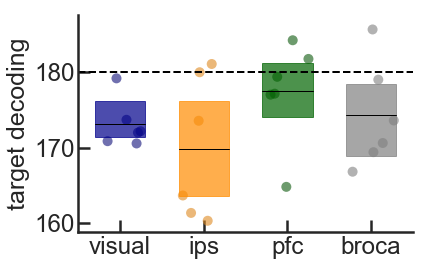

In [6]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5,1,'')

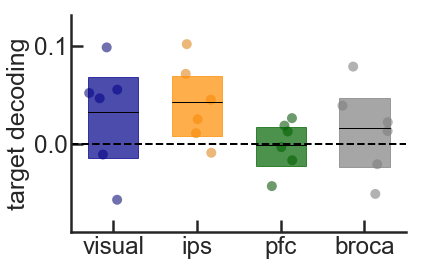

In [17]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_11.675', 'signal_14.01', 'signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

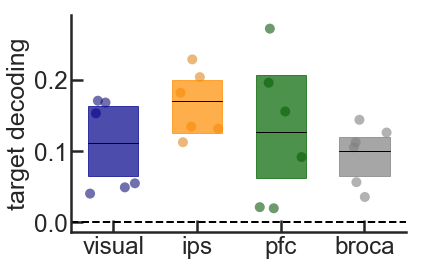

In [18]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

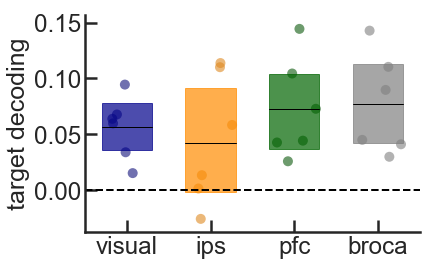

In [24]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')

In [3]:
### New method to calculate the POS (POS_IEM2.py), repeat the previous analysis.

In [4]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos2.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  angle_16.345  angle_18.68  angle_21.015  angle_23.35  angle_25.685  \
0  ...    169.995628   176.698185    177.345015   170.146896    174.572011   
1  ...    198.720570   205.436468    204.306631   175.453552    170.301198   
2  ...    155.739815   156.715449    157.012528   166.103992    167.303773   
3  ...    201.403664   205.015880    199.908555   195.556997    204.001771   
4  ...    175.862568   177.265149    202.287952   197.050484    191.674310   

   angle_28.02  angle_30.355  angle_32.69  angle_35.025  brain_region  
0   200.025291    210.676533   192.643453    179.674455        visual  
1   174.808181    180.558253   189.088109    189.855353        visual  
2   166.093750    172.354632   172.342901    164.157180        visual  
3   195.018913    196.506130   199.823966    189.812714        visual  
4   162.954661    178.710312   186.436893    179.216588        visual  

[5 rows x 79 columns]

In [5]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

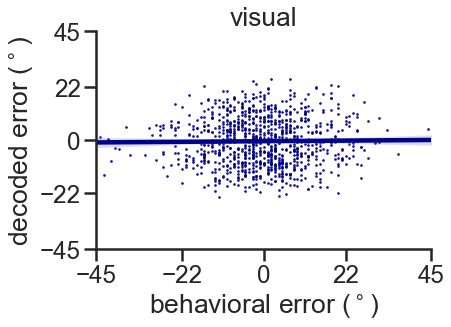

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              98.8184           
Min. group size:  141     Likelihood:         -3702.6870        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.503      0.316   -1.595   0.111   -1.122    0.115
A_err          0.011      0.026    0.432   0.665   -0.040    0.062
Group Var      0.000      0.038                                   



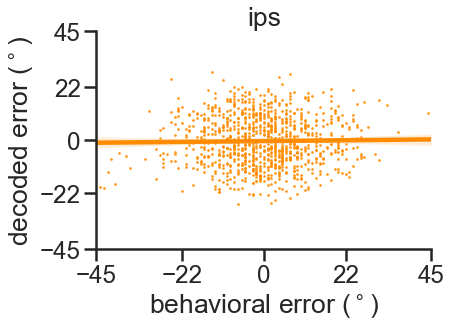

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              106.4663          
Min. group size:  141     Likelihood:         -3752.4976        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.427      4.225   -0.101   0.920   -8.708    7.855
A_err          0.017      0.027    0.634   0.526   -0.036    0.071
Group Var    106.466                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


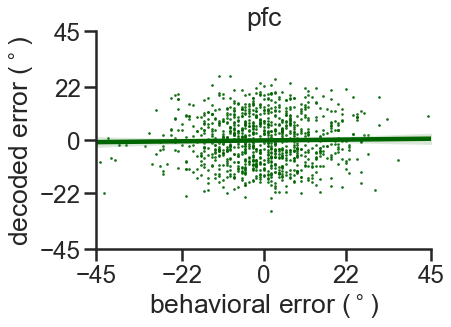

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              102.9429          
Min. group size:  141     Likelihood:         -3735.7716        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.190      4.155   -0.046   0.964   -8.333    7.953
A_err          0.019      0.027    0.704   0.481   -0.034    0.072
Group Var    102.943                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


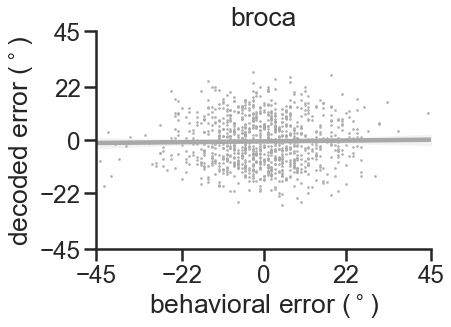

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              100.9435          
Min. group size:  141     Likelihood:         -3713.2969        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.564      0.322   -1.751   0.080   -1.196    0.067
A_err          0.015      0.027    0.566   0.571   -0.038    0.068
Group Var      0.009      0.044                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [6]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


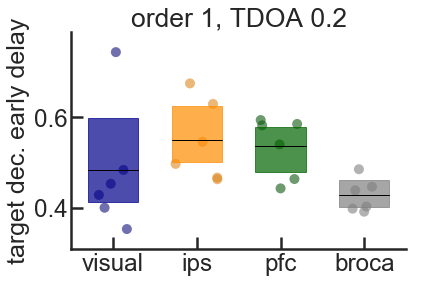

                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    4.666356     3.0  8.395281  0.000015
Residual      383.152690  2068.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.1202   0.0515 0.189   True 
broca   pfc    0.1071   0.0384 0.1759  True 
broca  visual  0.0556  -0.0132 0.1244 False 
 ips    pfc   -0.0131  -0.0819 0.0556 False 
 ips   visual -0.0646  -0.1334 0.0041 False 
 pfc   visual -0.0515  -0.1203 0.0172 False 
--------------------------------------------


In [10]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 0.2')
plt.show()


###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_1_02).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_02['decoding_delay'].values, groups=df_1_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    2.971843     3.0  5.635582  0.000763
Residual      341.713447  1944.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.0925   0.0234 0.1616  True 
broca   pfc    0.0961   0.027  0.1651  True 
broca  visual  0.0479  -0.0212 0.1169 False 
 ips    pfc    0.0035  -0.0655 0.0726 False 
 ips   visual -0.0447  -0.1137 0.0244 False 
 pfc   visual -0.0482  -0.1173 0.0209 False 
--------------------------------------------


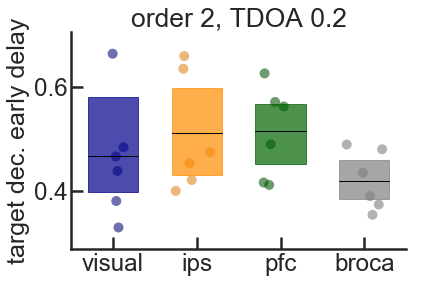

<Figure size 432x288 with 0 Axes>

In [11]:
df_2_02 = df.loc[(df['Condition']=='2_0.2')]
df_2_02['decoding_delay'] = df_2_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 0.2')
plt.figure()

###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_02).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_02['decoding_delay'].values, groups=df_2_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


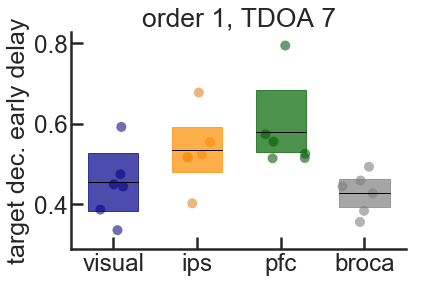

                                 
                                 Anova Table
                  sum_sq      df          F        PR(>F)
brain_region    6.979598     3.0  12.362693  5.221671e-08
Residual      357.560620  1900.0        NaN           NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.1063   0.034   0.1786  True 
broca   pfc    0.1511   0.0788  0.2234  True 
broca  visual  0.0268  -0.0455  0.0991 False 
 ips    pfc    0.0449  -0.0275  0.1172 False 
 ips   visual -0.0795  -0.1518 -0.0072  True 
 pfc   visual -0.1243  -0.1966  -0.052  True 
---------------------------------------------


In [12]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 7')
plt.show()



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_1_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_7['decoding_delay'].values, groups=df_1_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


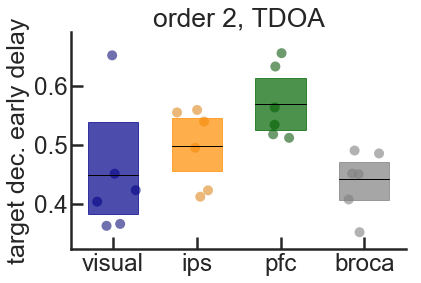

                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    5.268100     3.0  8.730402  0.000009
Residual      407.107388  2024.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0551  -0.0173  0.1276 False 
broca   pfc    0.1272   0.0547  0.1996  True 
broca  visual  0.0059  -0.0666  0.0783 False 
 ips    pfc    0.072   -0.0004  0.1444 False 
 ips   visual -0.0493  -0.1217  0.0232 False 
 pfc   visual -0.1213  -0.1937 -0.0489  True 
---------------------------------------------


In [13]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA')
plt.show()



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['decoding_delay'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                                 
                                 Anova Table
                  sum_sq      df         F    PR(>F)
brain_region    5.942464     3.0  6.777196  0.000152
Residual      591.569516  2024.0       NaN       NaN
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0992   0.0119  0.1865  True 
broca   pfc    0.0983   0.011   0.1856  True 
broca  visual -0.0175  -0.1048  0.0698 False 
 ips    pfc   -0.0009  -0.0882  0.0864 False 
 ips   visual -0.1168  -0.2041 -0.0295  True 
 pfc   visual -0.1159  -0.2032 -0.0286  True 
---------------------------------------------


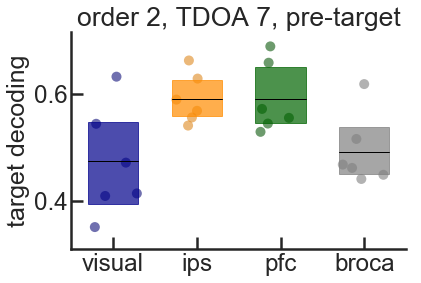

In [14]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7, pre-target')



###### Anova model
mod = ols(formula='decoding_delay ~ brain_region', data=df_2_7).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['decoding_delay'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )


In [15]:
### Timecourse

In [60]:
frames=[]

for Condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
    #
    df_ = df.loc[(df['Condition']==Condition)]
    #
    times_columns = ['signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025']
    ##
    times_TR=[]
    signal_deco=[]
    subj_ = []
    brain_reg = []

    for t in times_columns:
        sig = df_[t].values
        signal_deco.append(sig)
        ##
        tim = np.array([float(t.split('_')[1]) for i in range(len(sig))])
        times_TR.append(tim)
        ##
        sub = df_.subject.values
        subj_.append(sub)
        ##
        BR = df_.brain_region.values
        brain_reg.append(BR)

    ##
    ##
    timecourse_ = pd.DataFrame({'times': np.concatenate(times_TR), 'decoding': np.concatenate(signal_deco),
                                  'subject': np.concatenate(subj_), 'region': np.concatenate(brain_reg) })
    timecourse_['condition'] = Condition
    frames.append(timecourse_)

###
df_timecourse=pd.concat(frames)
df_timecourse

decoding  region subject   times condition
0      0.602729  visual    d001   0.000     1_0.2
1      0.134771  visual    d001   0.000     1_0.2
2      0.623413  visual    d001   0.000     1_0.2
3      1.052283  visual    d001   0.000     1_0.2
4      0.299795  visual    d001   0.000     1_0.2
...         ...     ...     ...     ...       ...
32443  0.388405   broca    l001  35.025       2_7
32444  1.397195   broca    l001  35.025       2_7
32445  0.000194   broca    l001  35.025       2_7
32446  0.000006   broca    l001  35.025       2_7
32447  0.245696   broca    l001  35.025       2_7

[127232 rows x 5 columns]

In [61]:
df_timecourse.region.unique()

array(['visual', 'ips', 'pfc', 'broca'], dtype=object)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


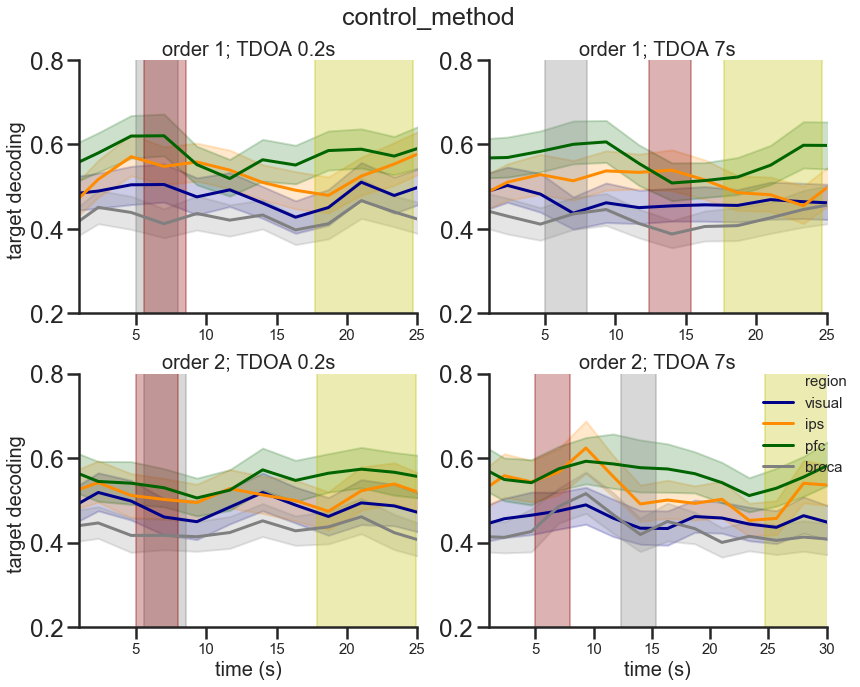

In [67]:
tiemcourse_c4(df_timecourse, 'control_method', ylims=[0.2,0.8])

In [ ]:
##different for each subject??

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


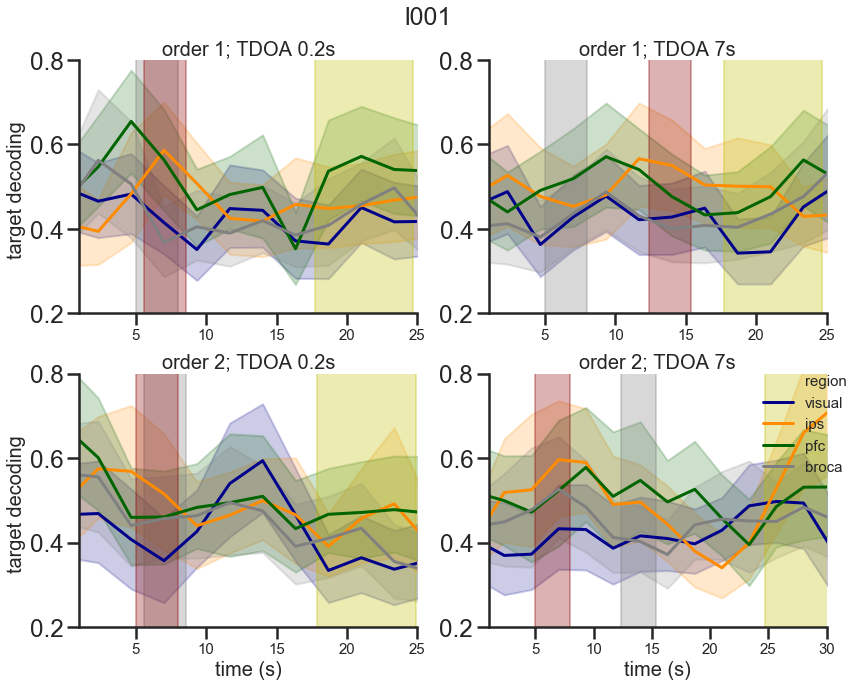

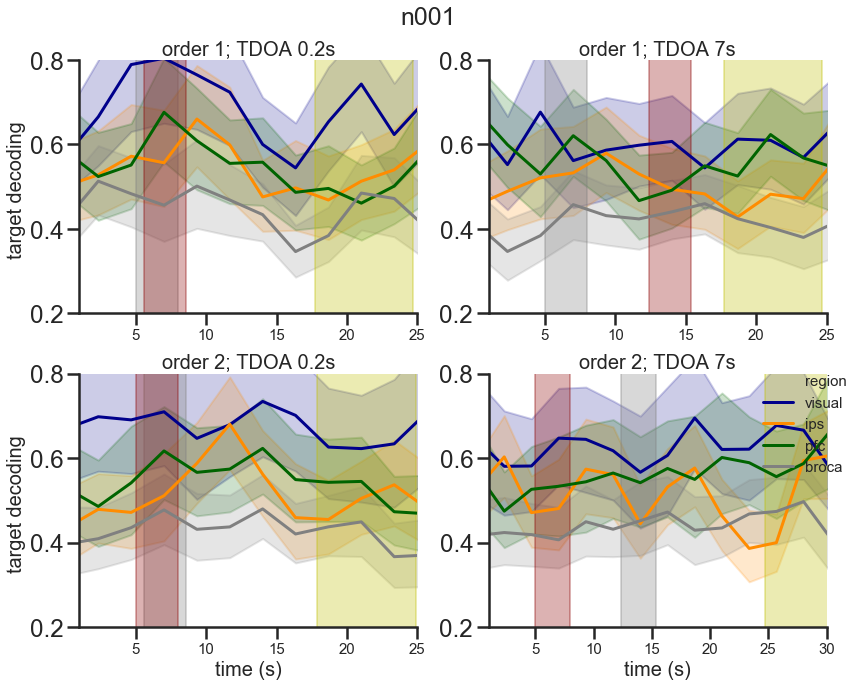

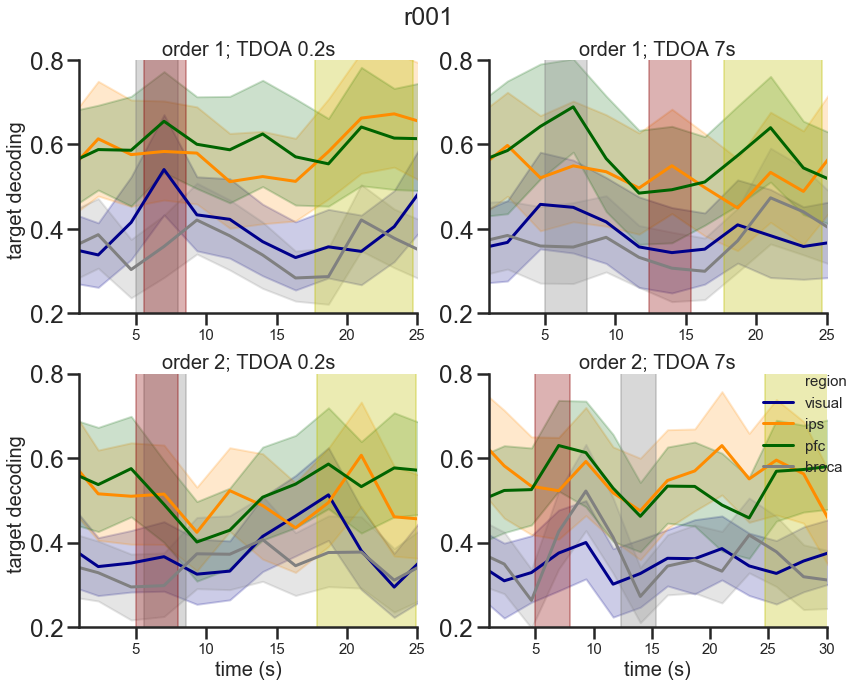

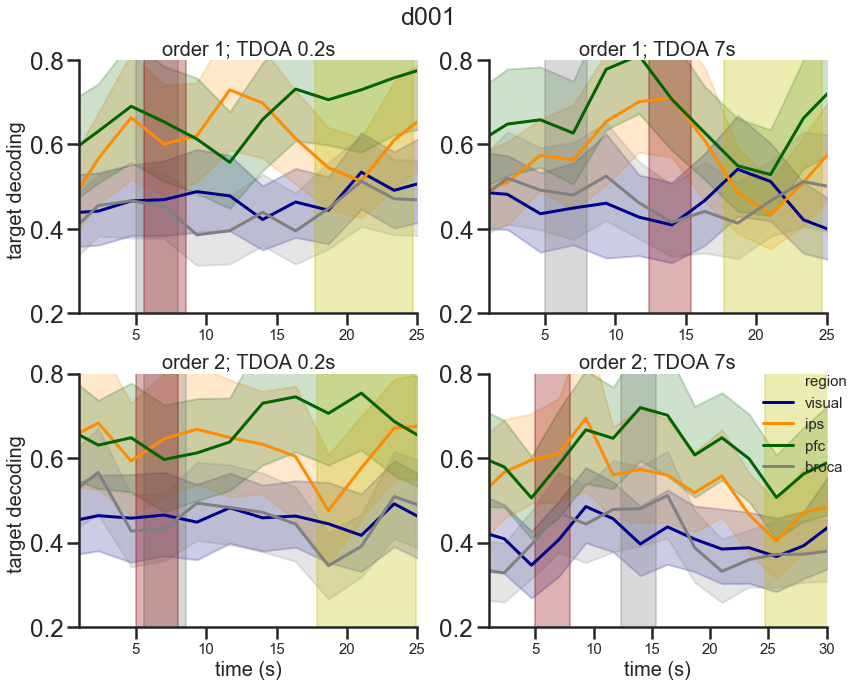

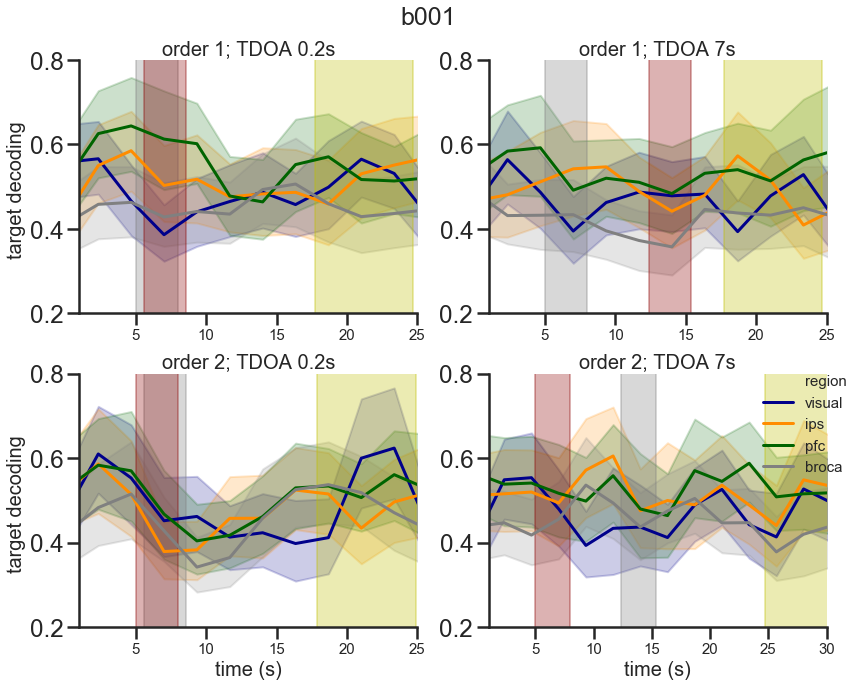

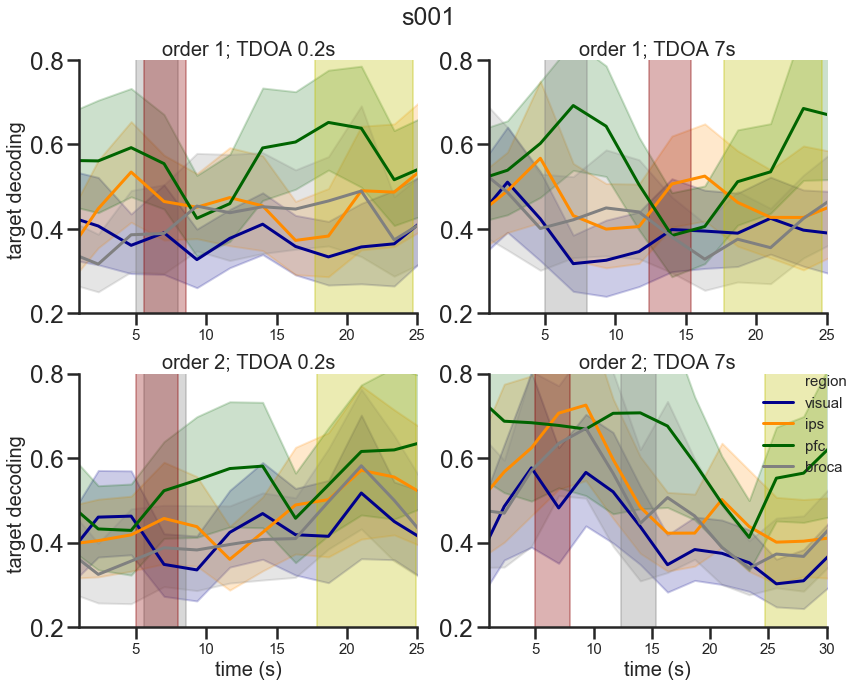

In [69]:
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='l001'], 'l001', ylims=[0.2,0.8])
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='n001'], 'n001', ylims=[0.2,0.8])
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='r001'], 'r001', ylims=[0.2,0.8])
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='d001'], 'd001', ylims=[0.2,0.8])
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='b001'], 'b001', ylims=[0.2,0.8])
tiemcourse_c4(df_timecourse.loc[df_timecourse['subject']=='s001'], 's001', ylims=[0.2,0.8])

In [ ]:
##Take off 0 to just take the modultaion compared to baseline (at 0)

In [70]:
df_timecourse.head()

decoding  region subject  times condition
0  0.602729  visual    d001    0.0     1_0.2
1  0.134771  visual    d001    0.0     1_0.2
2  0.623413  visual    d001    0.0     1_0.2
3  1.052283  visual    d001    0.0     1_0.2
4  0.299795  visual    d001    0.0     1_0.2

In [72]:
df_timecourse['decod_subst'] = np.nan

In [74]:
for subject in df_timecourse.subject.unique():
    for region in df_timecourse.region.unique():
        for condition in df_timecourse.condition.unique():
            baseline_0 = df_timecourse.loc[(df_timecourse['subject']==subject) & (df_timecourse['region']==region) &
                                           (df_timecourse['condition']==condition) & (df_timecourse['times']==0.0),
                                           'decoding'].mean()
            ##
            df_timecourse.loc[(df_timecourse['subject']==subject) & (df_timecourse['region']==region) &
                                           (df_timecourse['condition']==condition),
                                           'decod_subst'] = df_timecourse.loc[(df_timecourse['subject']==subject) & (df_timecourse['region']==region) &
                                           (df_timecourse['condition']==condition),
                                           'decoding'] - baseline_0
            
            


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


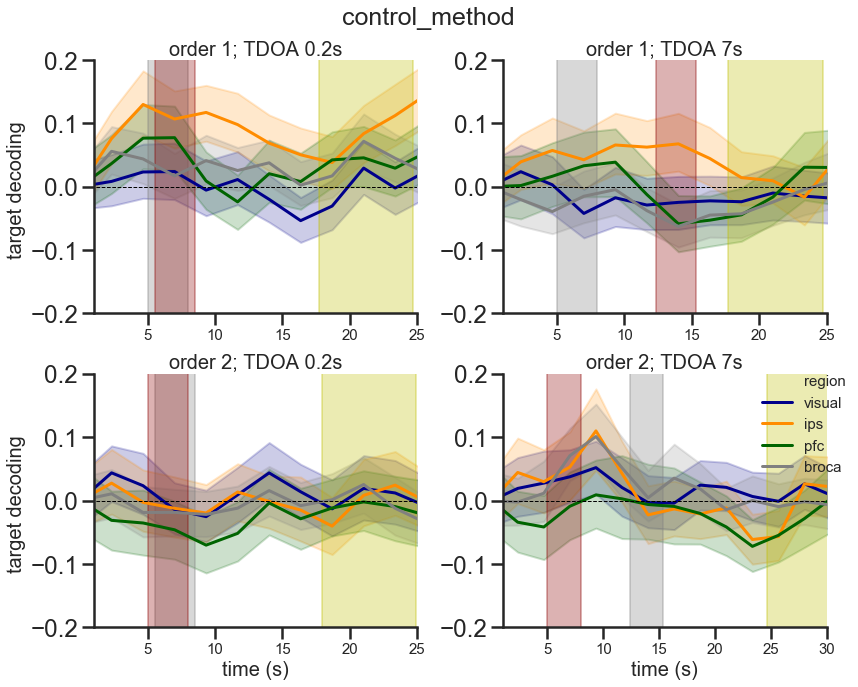

In [78]:
tiemcourse_c4(df_timecourse, 'control_method', dec_='decod_subst', ylims=[-0.2, 0.2])

In [85]:
df_timecourse.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

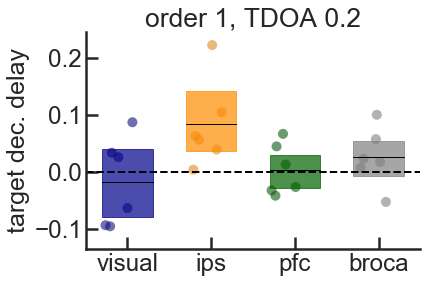

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0551   0.0352  0.0751  True 
broca   pfc    0.0039  -0.0161  0.0239 False 
broca  visual -0.0349  -0.0549 -0.0149  True 
 ips    pfc   -0.0512  -0.0712 -0.0313  True 
 ips   visual  -0.09    -0.11  -0.0701  True 
 pfc   visual -0.0388  -0.0588 -0.0188  True 
---------------------------------------------


In [88]:
df_1_02 = df_timecourse.loc[(df_timecourse['condition']=='1_0.2')]

linares_plot(x='region', y='decod_subst', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02.loc[((df_1_02['times']==9.34) | (df_1_02['times']==11.675) | (df_1_02['times']==14.01) | (df_1_02['times']==16.345))] ,
             palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. delay', fontsize=25)# (std. dist.)')
plt.title('order 1, TDOA 0.2')
plt.show()


###### Anova model
# mod = ols(formula='decod_subst ~ region', data=df_1_02).fit()
# aov_table = sm.stats.anova_lm(mod, typ=2)
# print( '                                 ')
# print( '                                 Anova Table')
# print( '==============================================================================')
# print( aov_table)
# print( '==============================================================================')
# print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_02['decod_subst'].values, groups=df_1_02['region'].values,  alpha=0.05)
print( tukey.summary()    )


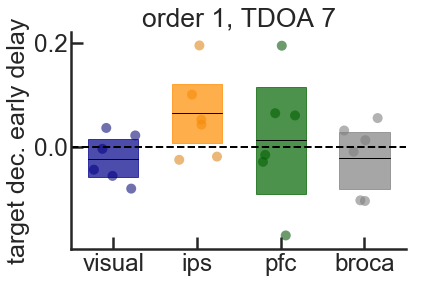

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0618   0.0411  0.0824  True 
broca   pfc    0.0176  -0.0031  0.0382 False 
broca  visual  0.0063  -0.0144  0.0269 False 
 ips    pfc   -0.0442  -0.0648 -0.0235  True 
 ips   visual -0.0555  -0.0761 -0.0348  True 
 pfc   visual -0.0113  -0.0319  0.0093 False 
---------------------------------------------


In [84]:
df_1_7 = df_timecourse.loc[(df_timecourse['condition']=='1_7')]

linares_plot(x='region', y='decod_subst', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7.loc[((df_1_7['times']==9.34) | (df_1_7['times']==11.675))] , palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. early delay', fontsize=25)# (std. dist.)')
plt.title('order 1, TDOA 7')
plt.show()


###### Anova model
# mod = ols(formula='decod_subst ~ region', data=df_1_7).fit()
# aov_table = sm.stats.anova_lm(mod, typ=2)
# print( '                                 ')
# print( '                                 Anova Table')
# print( '==============================================================================')
# print( aov_table)
# print( '==============================================================================')
# print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_7['decod_subst'].values, groups=df_1_7['region'].values,  alpha=0.05)
print( tukey.summary()    )


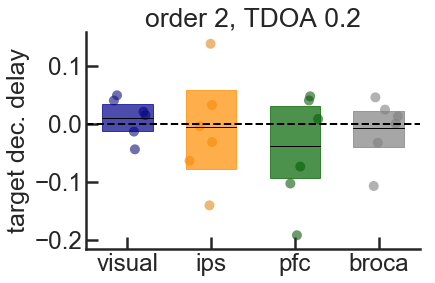

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.0071  -0.0138 0.028  False 
broca   pfc   -0.0138  -0.0347 0.0071 False 
broca  visual  0.0125  -0.0084 0.0334 False 
 ips    pfc   -0.0209  -0.0418  -0.0   True 
 ips   visual  0.0053  -0.0156 0.0263 False 
 pfc   visual  0.0263   0.0054 0.0472  True 
--------------------------------------------


In [89]:
df_2_02 = df_timecourse.loc[(df_timecourse['condition']=='2_0.2')]

linares_plot(x='region', y='decod_subst', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_02.loc[((df_2_02['times']==9.34) | (df_2_02['times']==11.675) | (df_2_02['times']==14.01) | (df_2_02['times']==16.345))] ,
             palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. delay', fontsize=25)# (std. dist.)')
plt.title('order 2, TDOA 0.2')
plt.show()


###### Anova model
# mod = ols(formula='decod_subst ~ region', data=df_2_02).fit()
# aov_table = sm.stats.anova_lm(mod, typ=2)
# print( '                                 ')
# print( '                                 Anova Table')
# print( '==============================================================================')
# print( aov_table)
# print( '==============================================================================')
# print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_02['decod_subst'].values, groups=df_2_02['region'].values,  alpha=0.05)
print( tukey.summary()    )


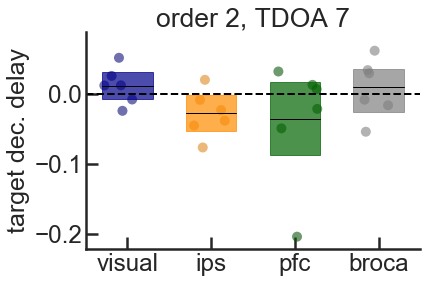

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips   -0.0073  -0.0286  0.014  False 
broca   pfc   -0.0334  -0.0547 -0.0121  True 
broca  visual  0.0026  -0.0188  0.0239 False 
 ips    pfc   -0.0261  -0.0474 -0.0048  True 
 ips   visual  0.0099  -0.0115  0.0312 False 
 pfc   visual  0.036    0.0147  0.0573  True 
---------------------------------------------


In [91]:
df_2_7 = df_timecourse.loc[(df_timecourse['condition']=='2_7')]

linares_plot(x='region', y='decod_subst', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7.loc[((df_2_7['times']==16.345) | (df_2_7['times']==18.68) | (df_2_7['times']==21.015) | (df_2_7['times']==23.35))] ,
             palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target dec. delay', fontsize=25)# (std. dist.)')
plt.title('order 2, TDOA 7')
plt.show()


###### Anova model
# mod = ols(formula='decod_subst ~ region', data=df_2_7).fit()
# aov_table = sm.stats.anova_lm(mod, typ=2)
# print( '                                 ')
# print( '                                 Anova Table')
# print( '==============================================================================')
# print( aov_table)
# print( '==============================================================================')
# print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['decod_subst'].values, groups=df_2_7['region'].values,  alpha=0.05)
print( tukey.summary()    )

In [ ]:
########## Decoding whole delay not TR by TR

In [92]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos2_delays.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  run  session_run  Condition  signal_d1  signal_d2  signal_dend  \
0  ...    1         10_1      1_0.2   0.332713   0.332713     0.143706   
1  ...    1         10_1        2_7   0.719069   0.041951     0.477031   
2  ...    1         10_1        1_7   0.670587   0.243110     0.243110   
3  ...    1         10_1        2_7   1.105350   0.023916     0.035972   
4  ...    1         10_1      1_0.2   0.055931   0.055931     0.468361   

     angle_d1    angle_d2  angle_dend  brain_region  
0  169.072969  169.072969  171.092227        visual  
1  190.016776  196.189708  171.956748        visual  
2  166.174041  162.679092  162.679092        visual  
3  186.002612  205.698449  202.098487        visual  
4  193.957551  193.957551  176.688104        visual  

[5 rows x 53 columns]

In [93]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


In [ ]:
##general

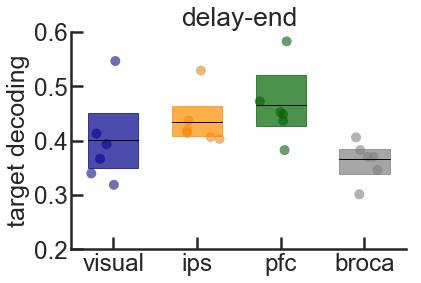

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.069    0.035   0.103   True 
broca   pfc    0.0988   0.0649  0.1328  True 
broca  visual  0.0356   0.0016  0.0696  True 
 ips    pfc    0.0298  -0.0041  0.0638 False 
 ips   visual -0.0334  -0.0674  0.0006 False 
 pfc   visual -0.0632  -0.0972 -0.0293  True 
---------------------------------------------


In [112]:
linares_plot(x='brain_region', y='signal_dend', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,0.6)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('delay-end')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['signal_dend'].values, groups=df['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

In [ ]:
## by condition

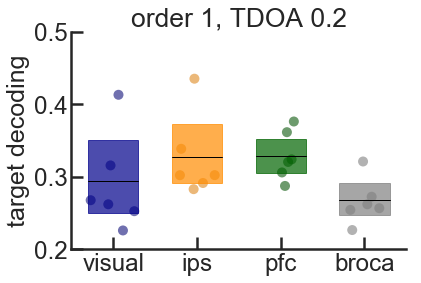

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.0593   0.0121 0.1064  True 
broca   pfc    0.0609   0.0138 0.108   True 
broca  visual  0.026   -0.0211 0.0732 False 
 ips    pfc    0.0016  -0.0455 0.0487 False 
 ips   visual -0.0333  -0.0804 0.0139 False 
 pfc   visual -0.0349   -0.082 0.0123 False 
--------------------------------------------


In [98]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]

linares_plot(x='brain_region', y='signal_d1', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,0.5)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 0.2')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_02['signal_d1'].values, groups=df_1_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

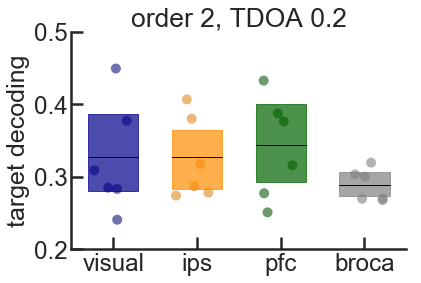

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
broca   ips    0.038   -0.0138 0.0898 False 
broca   pfc    0.0546   0.0028 0.1064  True 
broca  visual  0.038   -0.0138 0.0898 False 
 ips    pfc    0.0166  -0.0352 0.0684 False 
 ips   visual   -0.0   -0.0518 0.0518 False 
 pfc   visual -0.0166  -0.0684 0.0352 False 
--------------------------------------------


In [101]:
df_2_02 = df.loc[(df['Condition']=='2_0.2')]

linares_plot(x='brain_region', y='signal_d1', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,0.5)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 0.2')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_02['signal_d1'].values, groups=df_2_02['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

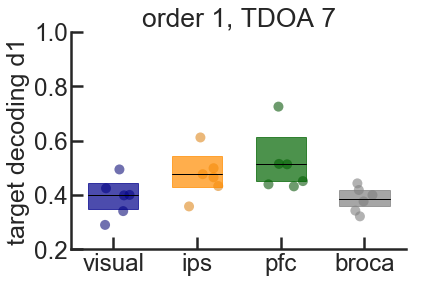

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0941   0.0217  0.1664  True 
broca   pfc    0.1284   0.056   0.2007  True 
broca  visual  0.0139  -0.0585  0.0862 False 
 ips    pfc    0.0343  -0.0381  0.1067 False 
 ips   visual -0.0802  -0.1526 -0.0078  True 
 pfc   visual -0.1145  -0.1869 -0.0421  True 
---------------------------------------------


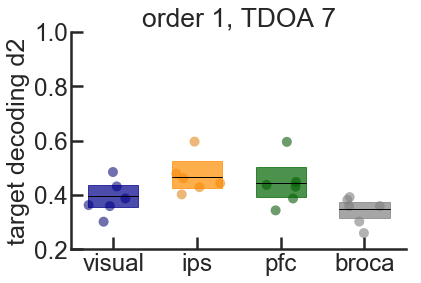

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.1189   0.0513  0.1865  True 
broca   pfc    0.0948   0.0272  0.1624  True 
broca  visual  0.0472  -0.0204  0.1148 False 
 ips    pfc   -0.0242  -0.0918  0.0434 False 
 ips   visual -0.0717  -0.1393 -0.0041  True 
 pfc   visual -0.0476  -0.1152   0.02  False 
---------------------------------------------


In [104]:
df_1_7 = df.loc[(df['Condition']=='1_7')]

linares_plot(x='brain_region', y='signal_d1', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding d1', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,1)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 7')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_7['signal_d1'].values, groups=df_1_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )




df_1_7 = df.loc[(df['Condition']=='1_7')]

linares_plot(x='brain_region', y='signal_d2', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding d2', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,1)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 7')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_1_7['signal_d2'].values, groups=df_1_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

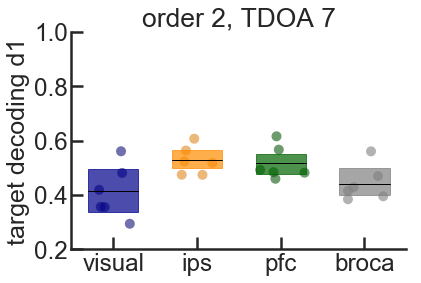

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0862  -0.0012  0.1737 False 
broca   pfc    0.0744   -0.013  0.1619 False 
broca  visual -0.0268  -0.1142  0.0607 False 
 ips    pfc   -0.0118  -0.0993  0.0757 False 
 ips   visual  -0.113  -0.2004 -0.0255  True 
 pfc   visual -0.1012  -0.1886 -0.0137  True 
---------------------------------------------


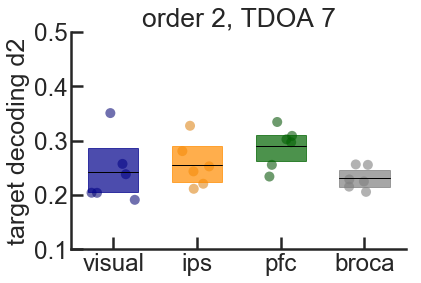

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
broca   ips    0.0229  -0.0205  0.0662 False 
broca   pfc    0.0587   0.0154  0.102   True 
broca  visual  0.0116  -0.0317  0.055  False 
 ips    pfc    0.0358  -0.0075  0.0792 False 
 ips   visual -0.0112  -0.0545  0.0321 False 
 pfc   visual -0.0471  -0.0904 -0.0037  True 
---------------------------------------------


In [106]:
df_2_7 = df.loc[(df['Condition']=='2_7')]

linares_plot(x='brain_region', y='signal_d1', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding d1', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.2,1)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['signal_d1'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )




df_2_7 = df.loc[(df['Condition']=='2_7')]

linares_plot(x='brain_region', y='signal_d2', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding d2', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(0.1, 0.5)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7')
plt.show()


####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_2_7['signal_d2'].values, groups=df_2_7['brain_region'].values,  alpha=0.05)
print( tukey.summary()    )

In [113]:
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  run  session_run  Condition  signal_d1  signal_d2  signal_dend  \
0  ...    1         10_1      1_0.2   0.332713   0.332713     0.143706   
1  ...    1         10_1        2_7   0.719069   0.041951     0.477031   
2  ...    1         10_1        1_7   0.670587   0.243110     0.243110   
3  ...    1         10_1        2_7   1.105350   0.023916     0.035972   
4  ...    1         10_1      1_0.2   0.055931   0.055931     0.468361   

     angle_d1    angle_d2  angle_dend  brain_region  
0  169.072969  169.072969  171.092227        visual  
1  190.016776  196.189708  171.956748        visual  
2  166.174041  162.679092  162.679092        visual  
3  186.002612  205.698449  202.098487        visual  
4  193.957551  193.957551  176.688104        visual  

[5 rows x 53 columns]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


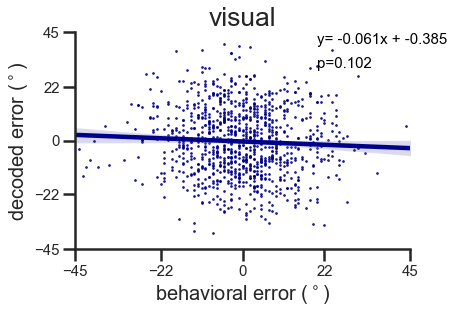

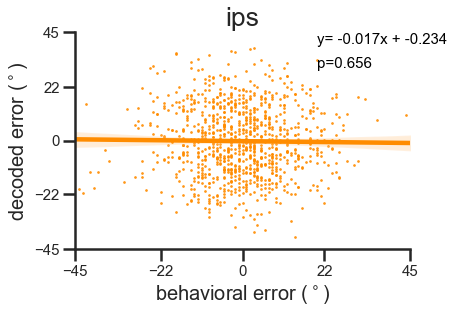

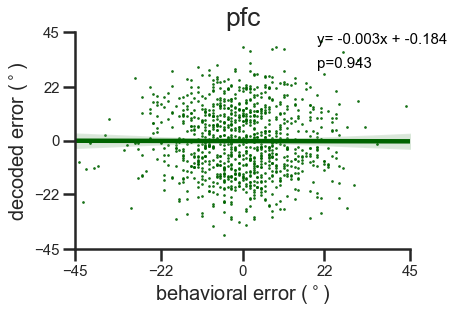

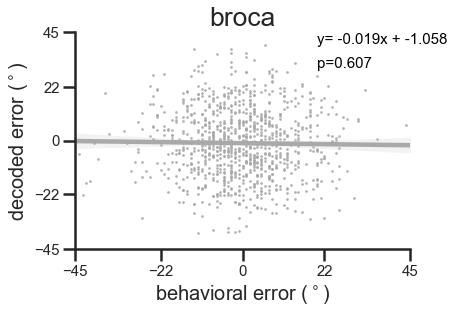

In [119]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    #df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['angle_dend']
    df_ = df_[~np.isnan(df_['decoding_delay_err'])]
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


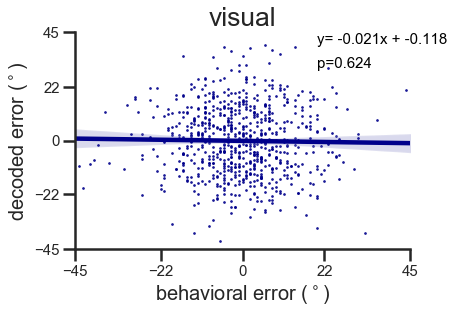

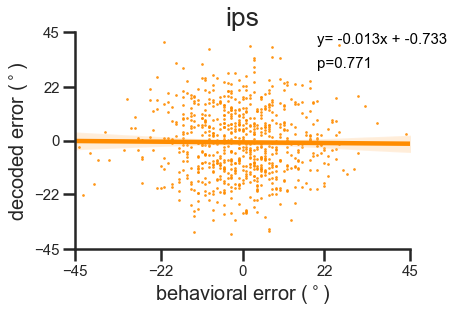

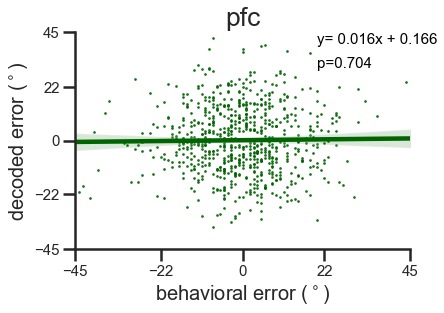

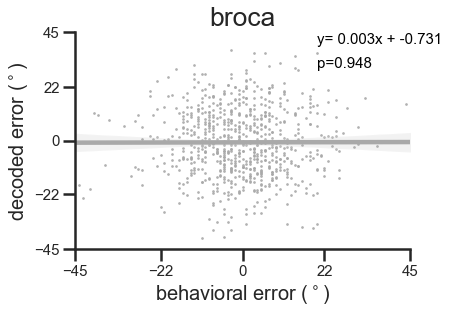

In [120]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45) & (df['Condition']!='2_7')]  ### (df['Condition']=='1_0.2')
    #df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['angle_d1']
    df_ = df_[~np.isnan(df_['decoding_delay_err'])]
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())